In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [7]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

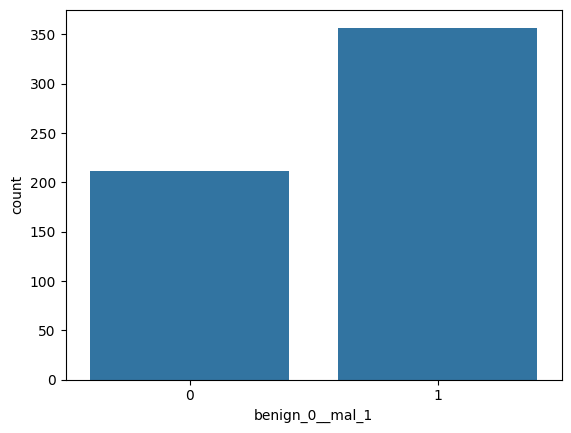

In [8]:
sns.countplot(x='benign_0__mal_1', data= df)
plt.show()

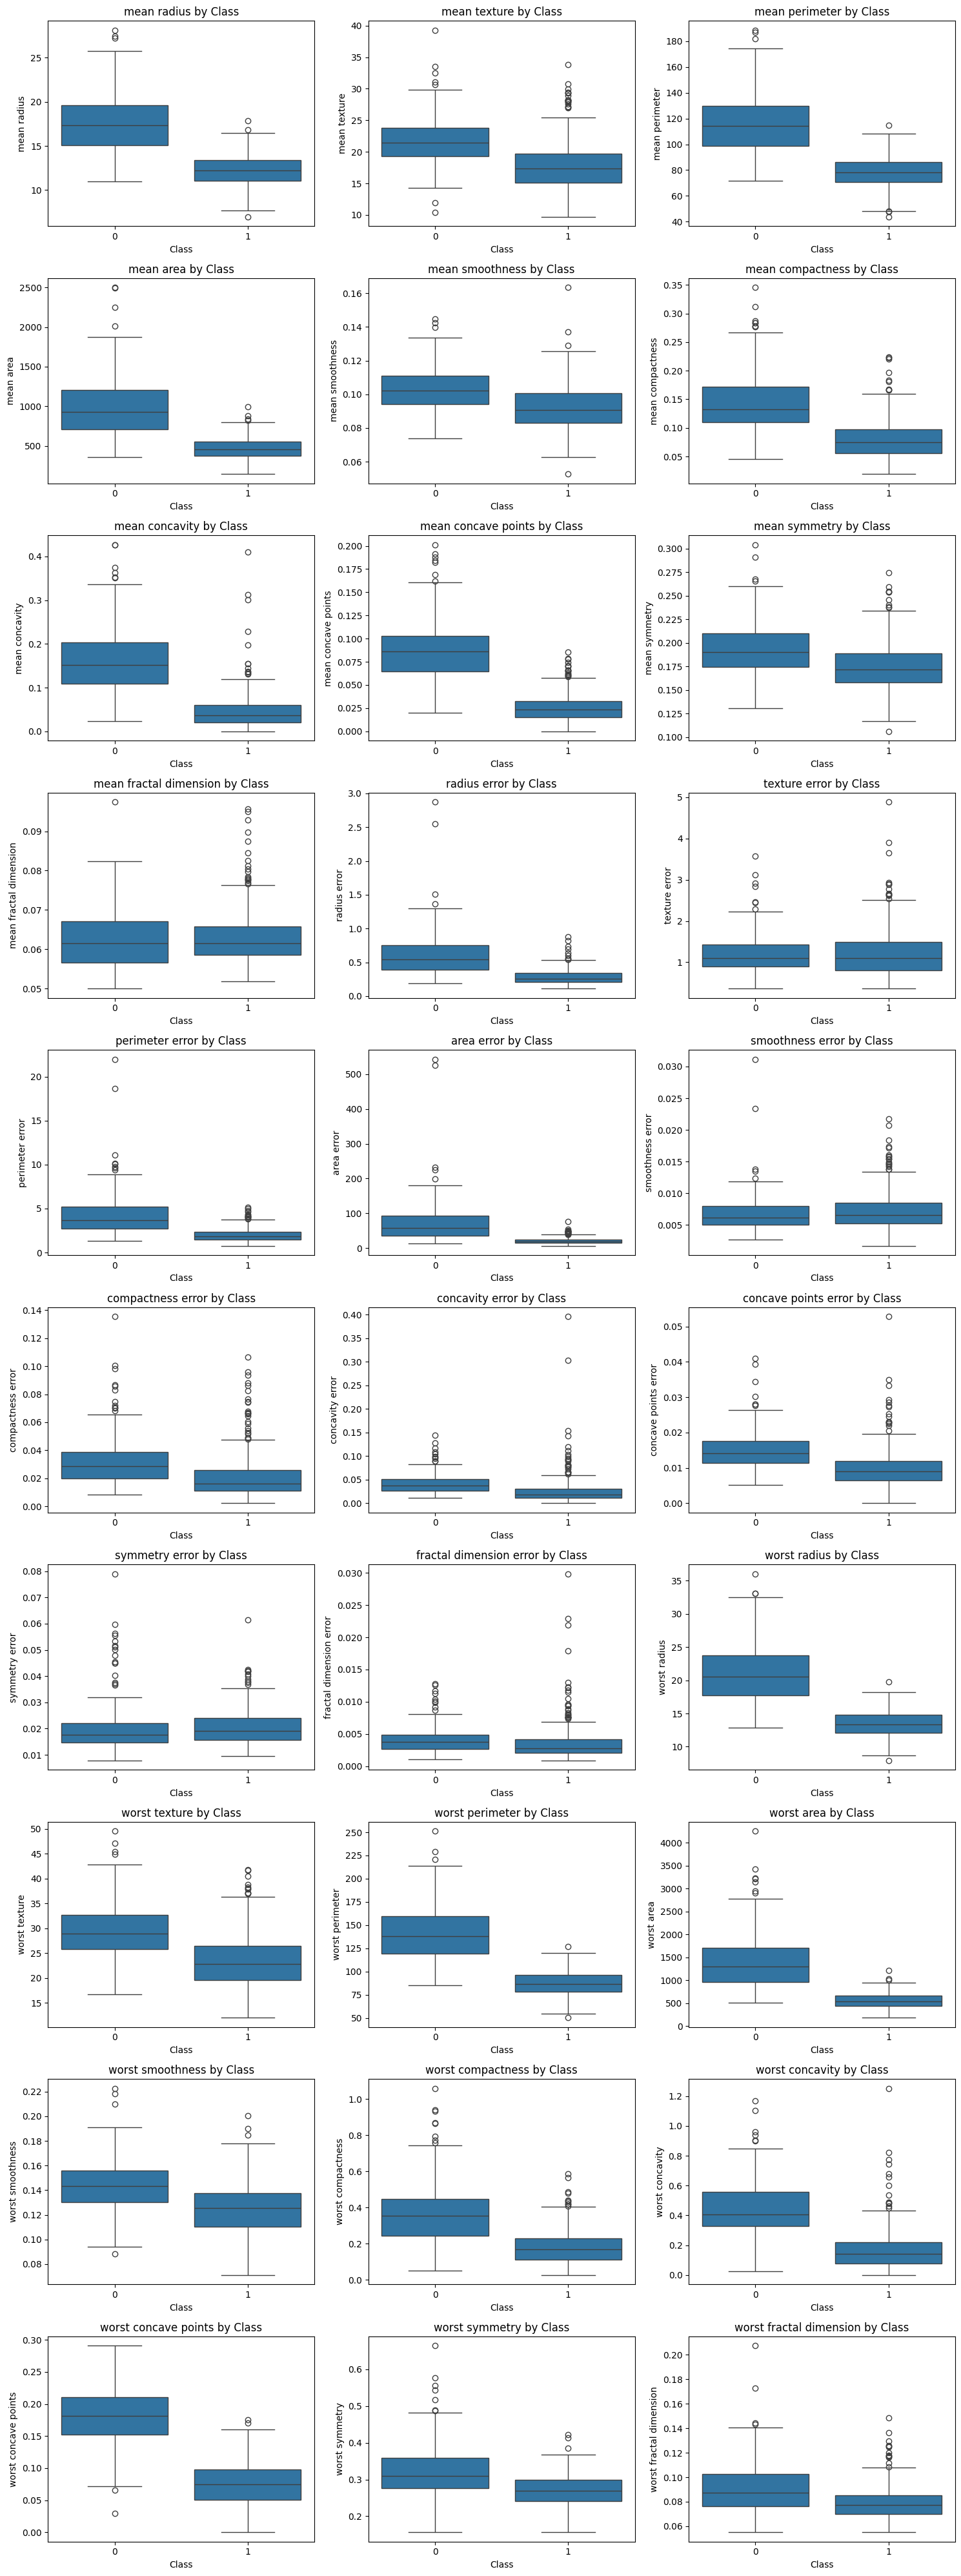

In [11]:
import math
num_col = [
    'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
]
# Grid setup
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(num_col) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  # make it easier to index

# Loop through columns and create boxplots
for i, col in enumerate(num_col):
    sns.boxplot(x='benign_0__mal_1', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} by Class')
    axes[i].set_xlabel("Class")
    axes[i].set_ylabel(col)

# Hide unused subplots if any
for j in range(len(num_col), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

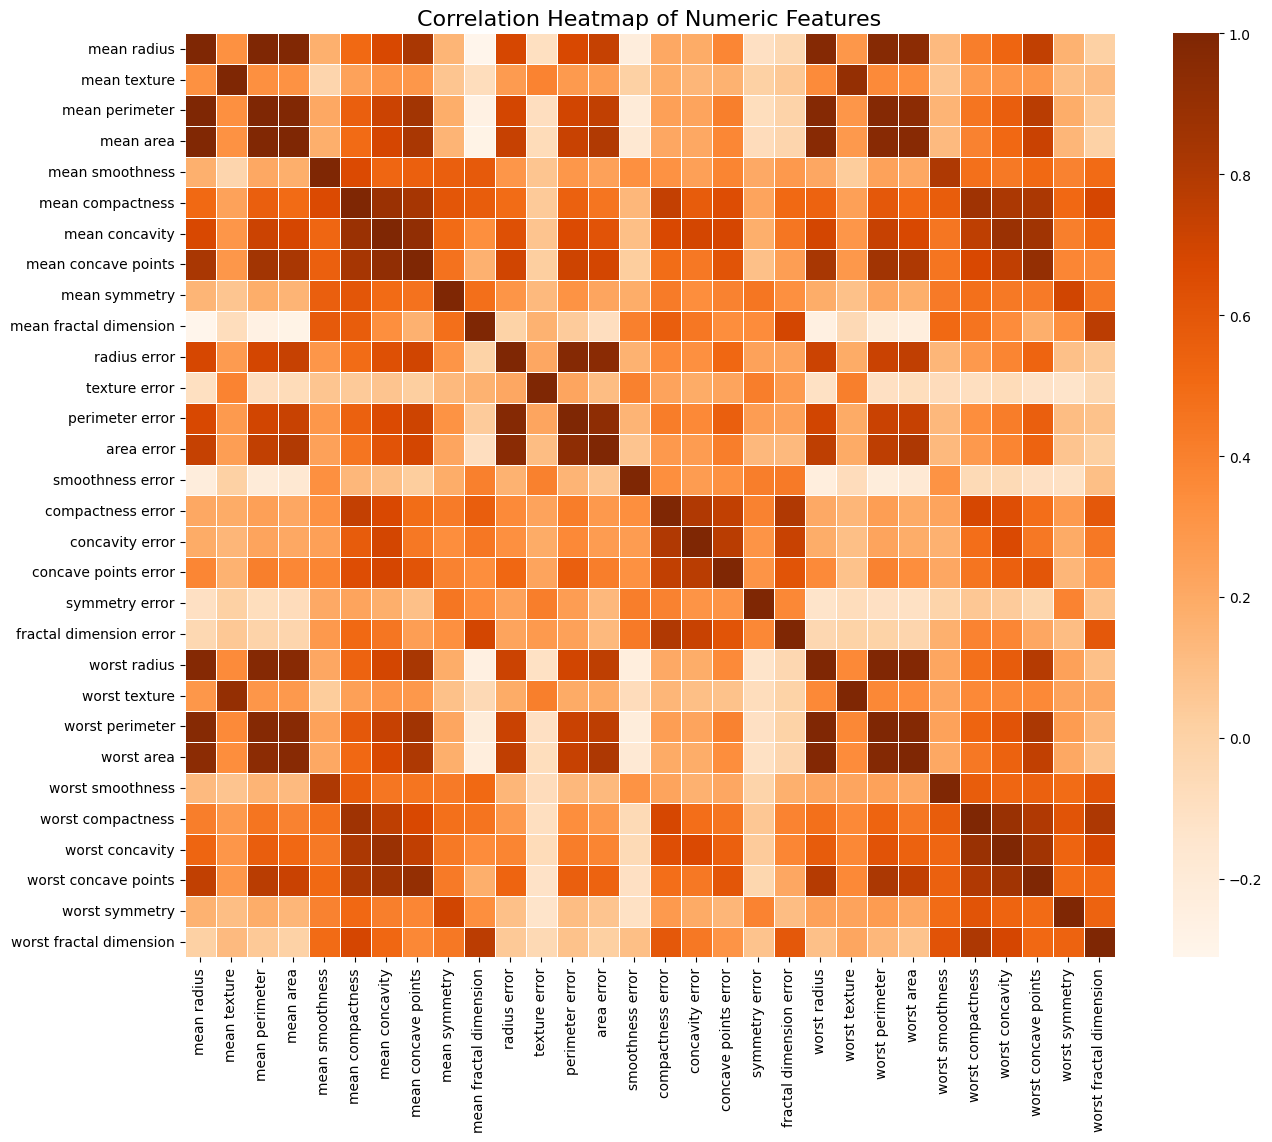

In [15]:
# Numeric features
num_col = [
    'mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension'
]

plt.figure(figsize=(15, 12))
sns.heatmap(df[num_col].corr(), annot=False, cmap='Oranges', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()



# MODEL TRAINING

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

X = df.drop(columns = ['benign_0__mal_1'])                      # indepedent and dependent features
y = df['benign_0__mal_1']

scaler = StandardScaler()

preprocessor = ColumnTransformer( [ ('StandardScaler', scaler, num_col) ] )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
# this function is used to remove the columns whose correlation matrix has a value
# exceeding than the threshold

def corre(dataset,threshold):

    numeric_data = dataset.select_dtypes(include=['number'])

    col_corr = set()
    corr_matrix = numeric_data.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j] > threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [22]:
corr_features = corre(X_train,0.75)

In [ ]:
# evaluating metrics:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

def evaluate_model(real_values, predicted_values):
    acc_score = accuracy_score(real_values, predicted_values)
    
    # For binary classification, we can use 'binary' or default (which is binary for 2 classes)
    score_f1 = f1_score(real_values, predicted_values)  # Default is 'binary' for binary classification
    score_recall = recall_score(real_values, predicted_values)
    preci_score = precision_score(real_values, predicted_values)
    
    # For binary classification, ROC-AUC is straightforward
    roc_auc = roc_auc_score(real_values, predicted_values)

    print("Accuracy:", f"{acc_score:.4f}")
    print("F1 Score:", f"{score_f1:.4f}")
    print("Recall:", f"{score_recall:.4f}")
    print("Precision:", f"{preci_score:.4f}")
    print("ROC-AUC:", f"{roc_auc:.4f}")
    
    return acc_score, score_f1, score_recall, preci_score, roc_auc 


In [24]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

scaled_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVC": SVC(random_state=42),
    "K-Neighbors": KNeighborsClassifier()
}

# Apply preprocessing
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

print("Training and evaluating scaled models...")
print("="*60)

for name, model in scaled_models.items():
    print(f"\nModel: {name}")
    print("-" * 40)
    
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    print("Performance on Training Set:")
    train_acc, train_f1, train_recall, train_precision, train_auc = evaluate_model(y_train, y_train_pred)
    
    print("\nPerformance on Test Set:")
    test_acc, test_f1, test_recall, test_precision, test_auc = evaluate_model(y_test, y_test_pred)
    
    print("="*60)


Training and evaluating scaled models...

Model: Logistic Regression
----------------------------------------
Performance on Training Set:
Accuracy: 0.9869
F1 Score: 0.9868
Recall: 0.9869
Precision: 0.9870
ROC-AUC: 0.9841

Performance on Test Set:
Accuracy: 0.9787
F1 Score: 0.9788
Recall: 0.9787
Precision: 0.9791
ROC-AUC: 0.9801

Model: SVC
----------------------------------------
Performance on Training Set:
Accuracy: 0.9843
F1 Score: 0.9842
Recall: 0.9843
Precision: 0.9846
ROC-AUC: 0.9793

Performance on Test Set:
Accuracy: 0.9681
F1 Score: 0.9682
Recall: 0.9681
Precision: 0.9685
ROC-AUC: 0.9685

Model: K-Neighbors
----------------------------------------
Performance on Training Set:
Accuracy: 0.9764
F1 Score: 0.9763
Recall: 0.9764
Precision: 0.9768
ROC-AUC: 0.9703

Performance on Test Set:
Accuracy: 0.9574
F1 Score: 0.9574
Recall: 0.9574
Precision: 0.9574
ROC-AUC: 0.9536


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

unscaled_model = {
    "Decision Tree" : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier()
}


print("Training and evaluating unscaled models...")
print("="*60)

for name, model in unscaled_model.items():
    print(f"\nModel: {name}")
    print("-" * 40)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print("Performance on Training Set:")
    train_acc, train_f1, train_recall, train_precision, train_auc = evaluate_model(y_train, y_train_pred)
    
    print("\nPerformance on Test Set:")
    test_acc, test_f1, test_recall, test_precision, test_auc = evaluate_model(y_test, y_test_pred)
    
    print("="*60)


Training and evaluating scaled models...

Model: Decision Tree
----------------------------------------
Performance on Training Set:
Accuracy: 1.0000
F1 Score: 1.0000
Recall: 1.0000
Precision: 1.0000
ROC-AUC: 1.0000

Performance on Test Set:
Accuracy: 0.9255
F1 Score: 0.9262
Recall: 0.9255
Precision: 0.9288
ROC-AUC: 0.9288

Model: RandomForestClassifier
----------------------------------------
Performance on Training Set:
Accuracy: 1.0000
F1 Score: 1.0000
Recall: 1.0000
Precision: 1.0000
ROC-AUC: 1.0000

Performance on Test Set:
Accuracy: 0.9521
F1 Score: 0.9519
Recall: 0.9521
Precision: 0.9522
ROC-AUC: 0.9428


In [ ]:
n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, 
min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, 

Hyper parameter tuning

In [30]:
rf_params = {
    'max_depth' : [5, 8, 15, None, 10], 
    'n_estimators' : [100, 200, 500], 
    'criterion' : ['gini', 'entropy'], 
    'min_samples_split' : [2, 8, 15, 20],
    'max_features' : ['sqrt', 'log2', None]  
}

In [32]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}

cv_model = [("RF", RandomForestClassifier(random_state=42), rf_params)]

print("Starting hyperparameter tuning for Random Forest...")
print("This may take a few minutes...")

for name, model, params in cv_model:
    random = RandomizedSearchCV(
        estimator=model, 
        param_distributions=params, 
        n_iter=10,  
        cv=5,
        n_jobs=-1, 
        verbose=1,  
        random_state=42
    )
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

print("\nHyperparameter tuning completed!")
for model_name in model_param:
    print(f"\n------Best params for {model_name}------")
    print(model_param[model_name])

Starting hyperparameter tuning for Random Forest...
This may take a few minutes...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Hyperparameter tuning completed!

------Best params for RF------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy'}


In [36]:
unscaled_model = {
    
    "RandomForestClassifier" : RandomForestClassifier(n_estimators= 500, min_samples_split= 2, max_features= 'log2', max_depth= None, criterion= 'entropy')
}


print("Hyper-Tuned model stats:")
print("="*60)

for name, model in unscaled_model.items():
    print(f"\nModel: {name}")
    print("-" * 40)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print("Performance on Training Set:")
    train_acc, train_f1, train_recall, train_precision, train_auc = evaluate_model(y_train, y_train_pred)
    
    print("\nPerformance on Test Set:")
    test_acc, test_f1, test_recall, test_precision, test_auc = evaluate_model(y_test, y_test_pred)
    
    print("="*60)


Hyper-Tuned model stats:

Model: RandomForestClassifier
----------------------------------------
Performance on Training Set:
Accuracy: 1.0000
F1 Score: 1.0000
Recall: 1.0000
Precision: 1.0000
ROC-AUC: 1.0000

Performance on Test Set:
Accuracy: 0.9681
F1 Score: 0.9680
Recall: 0.9681
Precision: 0.9681
ROC-AUC: 0.9619
